### Get SZ data

In [1]:
import tushare as ts 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

pro = ts.pro_api('6becc4167fb57f1cac059a66691d4e6d782b1f94319c6c6a0554fca1')
data = pro.daily(ts_code='000001.SZ', start_date='20230101', end_date='20231227')

df = data[['trade_date', 'close']]
df['trade_date'] = pd.to_datetime(df['trade_date'])
df = df.sort_values(by='trade_date') 
df.reset_index(inplace=True, drop=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   trade_date  240 non-null    datetime64[ns]
 1   close       240 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


/var/folders/ql/wwzgcgqn4gdd5ylht69yct1r0000gn/T/ipykernel_27433/1341103862.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trade_date'] = pd.to_datetime(df['trade_date'])


,trade_date,close
0,2023-01-03,13.77
1,2023-01-04,14.32
2,2023-01-05,14.48
3,2023-01-06,14.62
4,2023-01-09,14.80


### Plot series

In [2]:
def plot_entire_series(x, y, **kwargs):
    
    plt.figure(figsize=(16, 4))
    plt.plot(x, y, linewidth=2, color='black')
    
    for key, value in kwargs.items():
        plt.plot(x, value, linewidth=2, color=key)
        
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Close', fontsize=16)
    plt.show()
    
    return None

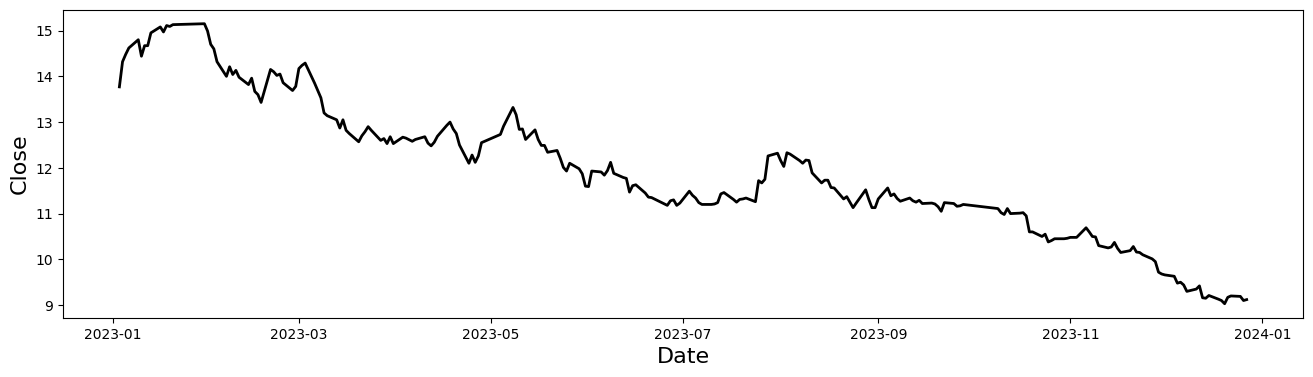

In [3]:
x = df['trade_date'].to_numpy()
y = df['close'].to_numpy()

plot_entire_series(x, y)

### MA5 and MA10 

In [4]:
ma5 = np.zeros(df.close.size-4)
for i in range(ma5.size):
    ma5[i] = np.mean(df.close[i:i+5]) 
ma5 = pd.Series(ma5, index=df.index[4:]) 
df['ma5'] = ma5 

ma10 = np.zeros(df.close.size-9)
for i in range(ma10.size):
    ma10[i] = np.mean(df.close[i:i+10]) 
ma10 = pd.Series(ma10, index=df.index[9:]) 
df['ma10'] = ma10 

df.head(15) 

,trade_date,close,ma5,ma10
0,2023-01-03,13.77,NaN,NaN
1,2023-01-04,14.32,NaN,NaN
2,2023-01-05,14.48,NaN,NaN
3,2023-01-06,14.62,NaN,NaN
4,2023-01-09,14.80,14.398,NaN
5,2023-01-10,14.44,14.532,NaN
6,2023-01-11,14.67,14.602,NaN
7,2023-01-12,14.67,14.640,NaN
8,2023-01-13,14.95,14.706,NaN
9,2023-01-16,15.08,14.762,14.580


### Bollinger Bands

In [5]:
ma20 = np.zeros(df.close.size-19)
for i in range(ma20.size):
    ma20[i] = np.mean(df.close[i:i+20])
ma20 = pd.Series(ma20, index=df.index[19:])
df['ma20'] = ma20

stds = np.zeros(df.close.size-19)
for i in range(stds.size):
    stds[i] = np.std(df.close[i:i+20])
stds = pd.Series(stds, index=df.index[19:])
df['stds'] = stds 

upper = df['ma20'] + 2 * df['stds'] 
lower = df['ma20'] - 2 * df['stds']

df['upper'] = upper
df['lower'] = lower 

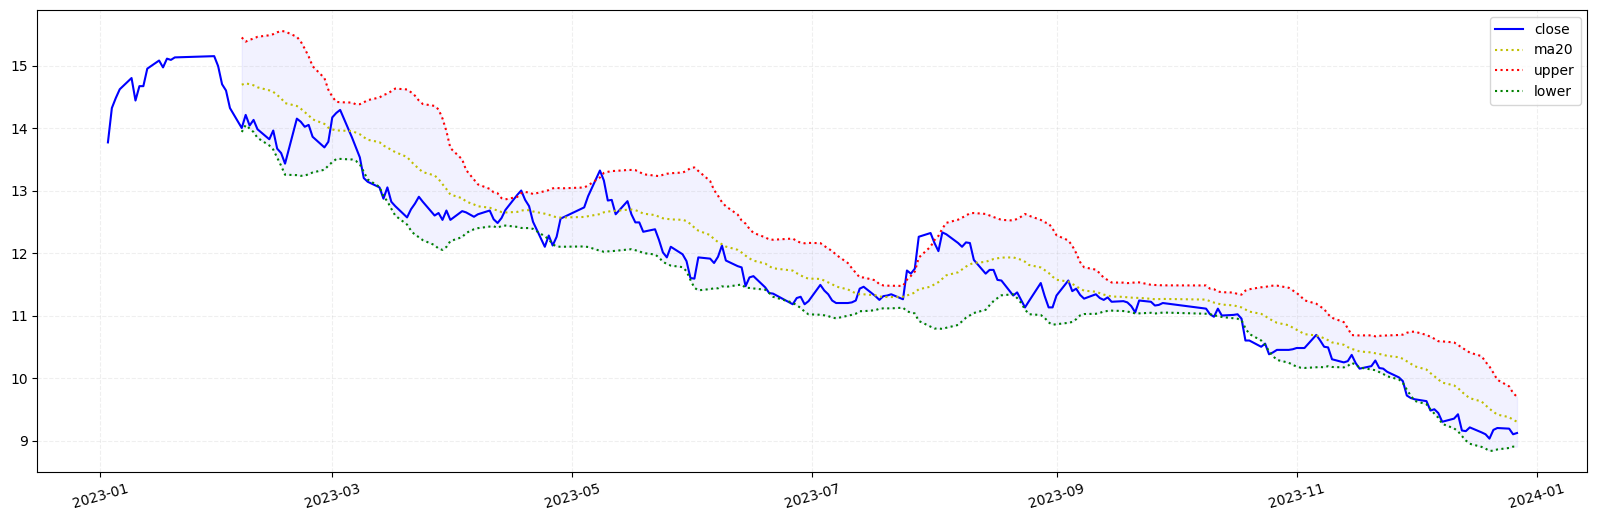

In [6]:
plt.figure(figsize=(20, 6)) 
plt.plot(df['trade_date'], df['close'], color='b', linestyle='-', label='close')
plt.plot(df['trade_date'], df['ma20'], color='y', alpha=1, linestyle=':', label='ma20')
plt.plot(df['trade_date'], df['upper'], color='r', alpha=1, linestyle=':', label='upper')
plt.plot(df['trade_date'], df['lower'], color='g', alpha=1, linestyle=':', label='lower') 

p1 = plt.fill_between(df['trade_date'], df['upper'], df['lower'], color='b', alpha=0.05) 
plt.tick_params(axis='x', labelrotation=16)
plt.grid(alpha=0.2, linestyle='--')
plt.legend() 